# Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
player_df = pd.read_csv('Data/fifa_players_data_for_models.csv')
player_df

,Unnamed: 0,overall,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0,93,93,34,170,72,4,4,5,85,...,75,96,20,35,24,6,11,15,14,8
1,1,92,92,32,185,81,4,4,5,71,...,90,88,35,42,19,15,6,12,8,10
2,2,91,91,36,187,83,4,5,5,87,...,88,95,24,32,24,7,11,15,14,11
3,3,91,91,29,175,68,5,5,5,85,...,93,93,35,32,29,9,9,15,15,11
4,4,91,91,30,181,70,5,4,4,94,...,83,89,68,65,53,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,18999,48,60,18,168,58,3,2,1,40,...,46,47,15,24,23,7,14,6,8,15
19000,19000,48,62,19,180,75,3,2,1,28,...,37,44,50,49,47,5,6,7,13,10
19001,19001,48,65,19,180,72,2,1,1,12,...,16,23,9,12,13,52,49,49,43,48
19002,19002,48,55,23,172,72,3,2,1,40,...,35,35,39,42,44,8,11,11,9,10


In [3]:
player_df.drop('Unnamed: 0', axis=1, inplace=True)
player_df

,overall,potential,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,attacking_crossing,attacking_finishing,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,93,93,34,170,72,4,4,5,85,95,...,75,96,20,35,24,6,11,15,14,8
1,92,92,32,185,81,4,4,5,71,95,...,90,88,35,42,19,15,6,12,8,10
2,91,91,36,187,83,4,5,5,87,95,...,88,95,24,32,24,7,11,15,14,11
3,91,91,29,175,68,5,5,5,85,83,...,93,93,35,32,29,9,9,15,15,11
4,91,91,30,181,70,5,4,4,94,82,...,83,89,68,65,53,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,48,60,18,168,58,3,2,1,40,52,...,46,47,15,24,23,7,14,6,8,15
19000,48,62,19,180,75,3,2,1,28,23,...,37,44,50,49,47,5,6,7,13,10
19001,48,65,19,180,72,2,1,1,12,5,...,16,23,9,12,13,52,49,49,43,48
19002,48,55,23,172,72,3,2,1,40,29,...,35,35,39,42,44,8,11,11,9,10


In [4]:
player_df.isna().sum()

overall                        0
potential                      0
age                            0
height_cm                      0
weight_kg                      0
weak_foot                      0
skill_moves                    0
international_reputation       0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_aggression           0
mentality_interceptions        0
mentality_

In [5]:
# Setting features and target

# Features
X = player_df.drop('overall', axis=1)
# Target
y = player_df['overall']

In [6]:
# Split the data into training and testing sets (test_size=0.25, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

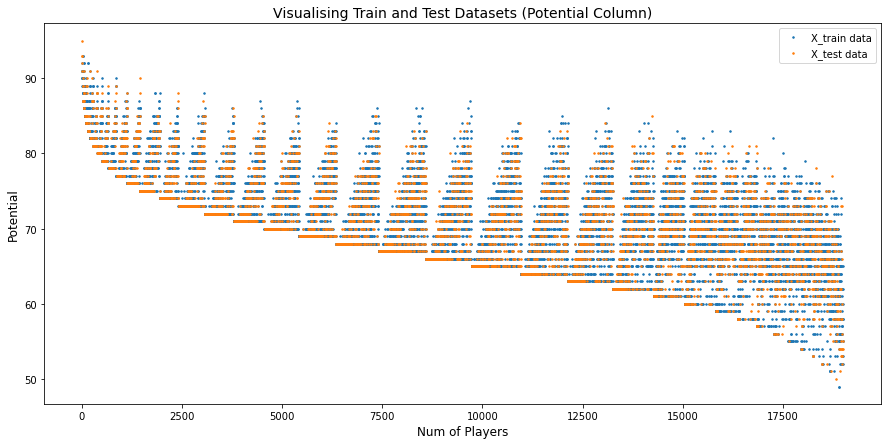

In [7]:
# Plot the data

plt.figure(figsize=(15, 7))

plt.plot(X_train['potential'], linestyle='None',
         marker='.', markersize=3.0, label='X_train data')
plt.plot(X_test['potential'], linestyle='None',
         marker='.', markersize=3.0, label='X_test data')

# Set the title and axis label
plt.title("Visualising Train and Test Datasets (Potential Column)", fontsize=14)
plt.xlabel('Num of Players', fontsize=12)
plt.ylabel('Potential', fontsize=12)

# Display the plot
plt.legend()
plt.show()

In [8]:
print("Length of training data", len(X_train))
print("Length of testing data", len(X_test))

Length of training data 14253
Length of testing data 4751


## Linear Regression Model

### Base model

In [9]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [11]:
# Cross validation score
from sklearn.model_selection import cross_val_score

cv = cross_val_score(linreg, X_train, y_train, cv=5)
cv_score = cv.mean()
print(cv_score)

0.9318213787493443


In [12]:
from sklearn.metrics import r2_score, mean_squared_error

linreg_R2_training = r2_score(y_train, y_pred_train)
linreg_R2_testing = r2_score(y_test, y_pred_test)
print('Linear Regression R2 - Training:', linreg_R2_training)
print('Linear Regression R2 - Testing:', linreg_R2_testing)

linreg_rmse_training = mean_squared_error(y_train, y_pred_train, squared=False)
linreg_rmse_testing = mean_squared_error(y_test, y_pred_test, squared=False)
print('Linear Regression RMSE - Training:', linreg_rmse_training)
print('Linear Regression RMSE - Testing:', linreg_rmse_testing)

Linear Regression R2 - Training: 0.9323402899611049
Linear Regression R2 - Testing: 0.9317821951689985
Linear Regression RMSE - Training: 1.777792377669288
Linear Regression RMSE - Testing: 1.7784755011364544


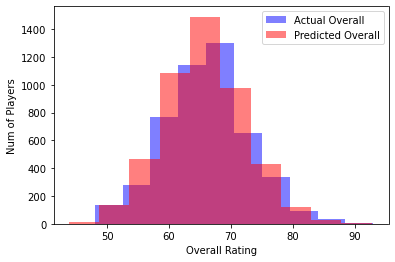

In [13]:
plt.hist(y_test, color='blue', label='Actual Overall', alpha=0.5)
plt.hist(y_pred_test, color='red', label='Predicted Overall', alpha=0.5)
plt.xlabel('Overall Rating')
plt.ylabel('Num of Players')
plt.legend()
plt.show()

## Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
dt_y_pred_train = dt.predict(X_train)
dt_y_pred_test = dt.predict(X_test)

In [16]:
# Cross validation score
from sklearn.model_selection import cross_val_score

cv = cross_val_score(dt, X_train, y_train, cv=5)
cv_score = cv.mean()
print(cv_score)

0.9250937435497855


In [17]:
from sklearn.metrics import r2_score, mean_squared_error

dt_R2_training = r2_score(y_train, dt_y_pred_train)
dt_R2_testing = r2_score(y_test, dt_y_pred_test)
print('Decision Tree Regression R2 - Training:', dt_R2_training)
print('Decision Tree Regression R2 - Testing:', dt_R2_testing)

dt_rmse_training = mean_squared_error(y_train, dt_y_pred_train, squared=False)
dt_rmse_testing = mean_squared_error(y_test, dt_y_pred_test, squared=False)
print('Descision Tree Regression RMSE - Training:', dt_rmse_training)
print('Decision Tree Regression RMSE - Testing:', dt_rmse_testing)

Decision Tree Regression R2 - Training: 1.0
Decision Tree Regression R2 - Testing: 0.9290960939958554
Descision Tree Regression RMSE - Training: 0.0
Decision Tree Regression RMSE - Testing: 1.8131515152284796


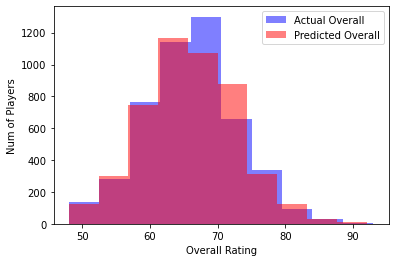

In [18]:
plt.hist(y_test, color='blue', label='Actual Overall', alpha=0.5)
plt.hist(dt_y_pred_test, color='red', label='Predicted Overall', alpha=0.5)
plt.xlabel('Overall Rating')
plt.ylabel('Num of Players')
plt.legend()
plt.show()

## Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
        n_estimators = 1000, max_features=10, max_depth=7, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=10, n_estimators=1000,
                      random_state=42)

In [20]:
rf_y_pred_train = rf.predict(X_train)
rf_y_pred_test = rf.predict(X_test)

In [21]:
# Cross validation score
from sklearn.model_selection import cross_val_score

cv = cross_val_score(rf, X_train, y_train, cv=5)
cv_score = cv.mean()
print(cv_score)

0.9476336993957026


In [22]:
from sklearn.metrics import r2_score, mean_squared_error

rf_R2_training = r2_score(y_train, rf_y_pred_train)
rf_R2_testing = r2_score(y_test, rf_y_pred_test)
print('Random Forest Regression R2 - Training:', rf_R2_training)
print('Random Forest Regression R2 - Testing:', rf_R2_testing)

rf_rmse_training = mean_squared_error(y_train, rf_y_pred_train, squared=False)
rf_rmse_testing = mean_squared_error(y_test, rf_y_pred_test, squared=False)
print('Random Forest Regression RMSE - Training:', rf_rmse_training)
print('Random Forest Regression RMSE - Testing:', rf_rmse_testing)

Random Forest Regression R2 - Training: 0.9521080043878505
Random Forest Regression R2 - Testing: 0.9463425527613615
Random Forest Regression RMSE - Training: 1.4957101496336946
Random Forest Regression RMSE - Testing: 1.5772989730715963


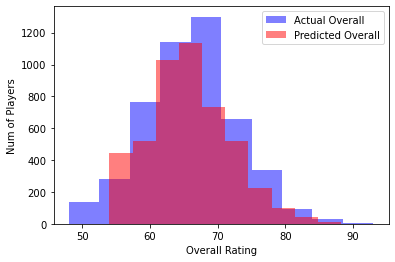

In [23]:
plt.hist(y_test, color='blue', label='Actual Overall', alpha=0.5)
plt.hist(rf_y_pred_test, color='red', label='Predicted Overall', alpha=0.5)
plt.xlabel('Overall Rating')
plt.ylabel('Num of Players')
plt.legend()
plt.show()

## Random Forest Model with Random Search

In [24]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, 200, 300],
    'n_estimators': list(range(50, 1000, 50))
}

In [25]:
# Runtime (7min)
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5, n_jobs=-1)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [50, 100, 200, 300],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950]})

In [26]:
rf_random.best_score_

0.9764746476059288

In [27]:
rf_random.best_params_

{'n_estimators': 900, 'max_depth': 300, 'bootstrap': True}

In [28]:
rf_random_y_pred_train = rf_random.predict(X_train)
rf_random_y_pred_test = rf_random.predict(X_test)

In [29]:
# Cross validation score (runtime: 33min)
from sklearn.model_selection import cross_val_score

cv = cross_val_score(rf_random, X_train, y_train, cv=5)
cv_score = cv.mean()
print(cv_score)

0.976412472127454


In [30]:
from sklearn.metrics import r2_score, mean_squared_error

rf_random_R2_training = r2_score(y_train, rf_random_y_pred_train)
rf_random_R2_testing = r2_score(y_test, rf_random_y_pred_test)
print('Random Forest Regression with Random Search R2 - Training:', rf_random_R2_training)
print('Random Forest Regression with Random Search R2 - Testing:', rf_random_R2_testing)

rf_random_rmse_training = mean_squared_error(y_train, rf_random_y_pred_train, squared=False)
rf_random_rmse_testing = mean_squared_error(y_test, rf_random_y_pred_test, squared=False)
print('Random Forest Regression with Random Search RMSE - Training:', rf_random_rmse_training)
print('Random Forest Regression with Random Search RMSE - Testing:', rf_random_rmse_testing)

Random Forest Regression with Random Search R2 - Training: 0.9969537848863045
Random Forest Regression with Random Search R2 - Testing: 0.9764616855181628
Random Forest Regression with Random Search RMSE - Training: 0.3772213438925303
Random Forest Regression with Random Search RMSE - Testing: 1.0446882195895917


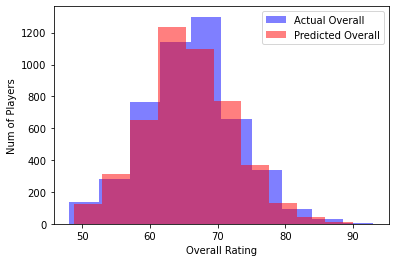

In [31]:
plt.hist(y_test, color='blue', label='Actual Overall', alpha=0.5)
plt.hist(rf_random_y_pred_test, color='red', label='Predicted Overall', alpha=0.5)
plt.xlabel('Overall Rating')
plt.ylabel('Num of Players')
plt.legend()
plt.show()

### XGBoost with Random Search

In [32]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, 200, 300],
    'n_estimators': list(range(50, 1000, 50))
}

In [33]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=5, n_jobs=-1)
xgb_random.fit(X_train, y_train)

[20:12:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { bootstrap } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [34]:
xgb_random.best_score_

0.9714670189633926

In [35]:
xgb_random.best_params_

{'n_estimators': 700, 'max_depth': 50, 'bootstrap': True}

In [36]:
xgb_random_y_pred_train = xgb_random.predict(X_train)
xgb_random_y_pred_test = xgb_random.predict(X_test)

In [37]:
# Cross validation score (runtime: 10min)
from sklearn.model_selection import cross_val_score

cv = cross_val_score(xgb_random, X_train, y_train, cv=5)
cv_score = cv.mean()
print(cv_score)

[20:13:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { bootstrap } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:13:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { bootstrap } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:14:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { bootstrap } might not be used.

  This may not be accurate due to some parameters are only used in language

In [38]:
from sklearn.metrics import r2_score, mean_squared_error

xgb_random_R2_training = r2_score(y_train, xgb_random_y_pred_train)
xgb_random_R2_testing = r2_score(y_test, xgb_random_y_pred_test)
print('XGBoost with Random Search R2 - Training:', xgb_random_R2_training)
print('XGBoost with Random Search R2 - Testing:', xgb_random_R2_testing)

xgb_random_rmse_training = mean_squared_error(y_train, xgb_random_y_pred_train, squared=False)
xgb_random_rmse_testing = mean_squared_error(y_test, xgb_random_y_pred_test, squared=False)
print('XGBoost with Random Search RMSE - Training:', xgb_random_rmse_training)
print('XGBoost with Random Search RMSE - Testing:', xgb_random_rmse_testing)

XGBoost with Random Search R2 - Training: 0.9999999963683612
XGBoost with Random Search R2 - Testing: 0.973058554639656
XGBoost with Random Search RMSE - Training: 0.00041187676994207644
XGBoost with Random Search RMSE - Testing: 1.1176593677200812


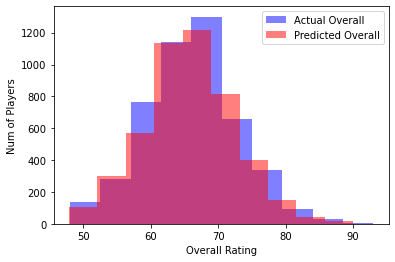

In [39]:
plt.hist(y_test, color='blue', label='Actual Overall', alpha=0.5)
plt.hist(xgb_random_y_pred_test, color='red', label='Predicted Overall', alpha=0.5)
plt.xlabel('Overall Rating')
plt.ylabel('Num of Players')
plt.legend()
plt.show()

## Support Vector Regression Model

In [60]:
from sklearn.preprocessing import RobustScaler

scale = RobustScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [61]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train_scale, y_train)

SVR()

In [62]:
svr_y_pred_train = svr.predict(X_train_scale)
svr_y_pred_test = svr.predict(X_test_scale)

In [63]:
# Cross validation score
from sklearn.model_selection import cross_val_score

cv = cross_val_score(svr, X_train, y_train, cv=5)
cv_score = cv.mean()
print(cv_score)

0.9767211396609541


In [64]:
from sklearn.metrics import r2_score, mean_squared_error

svr_R2_training = r2_score(y_train, svr_y_pred_train)
svr_R2_testing = r2_score(y_test, svr_y_pred_test)
print('Support Vector Regression R2 - Training:', svr_R2_training)
print('Support Vector Regression R2 - Testing:', svr_R2_testing)

svr_rmse_training = mean_squared_error(y_train, svr_y_pred_train, squared=False)
svr_rmse_testing = mean_squared_error(y_test, svr_y_pred_test, squared=False)
print('Support Vector Regression RMSE - Training:', svr_rmse_training)
print('Support Vector Regression RMSE - Testing:', svr_rmse_testing)

Support Vector Regression R2 - Training: 0.980888942645615
Support Vector Regression R2 - Testing: 0.9790370612443922
Support Vector Regression RMSE - Training: 0.944840132014255
Support Vector Regression RMSE - Testing: 0.9858823683940229


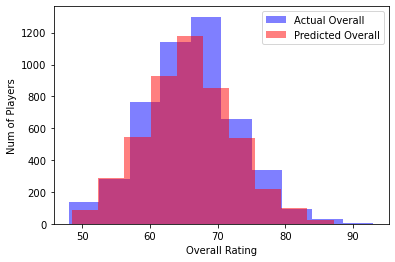

In [65]:
plt.hist(y_test, color='blue', label='Actual Overall', alpha=0.5)
plt.hist(svr_y_pred_test, color='red', label='Predicted Overall', alpha=0.5)
plt.xlabel('Overall Rating')
plt.ylabel('Num of Players')
plt.legend()
plt.show()

## Model Testing Results

In [66]:
names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'RF w/ Random Serach', 'XGBoost', 'Support Vector']
columns = ['Model', 'R2']
scores = [linreg_R2_testing, dt_R2_testing, rf_R2_testing, rf_random_R2_testing, xgb_random_R2_testing, svr_R2_testing]
model_R2_results = pd.DataFrame([[x, y] for x, y in zip(names, scores)], columns = columns)
model_R2_results

,Model,R2
0,Linear Regression,0.931782
1,Decision Tree,0.929096
2,Random Forest,0.946343
3,RF w/ Random Serach,0.976462
4,XGBoost,0.973059
5,Support Vector,0.979037


In [67]:
names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'RF w/ Random Serach', 'XGBoost', 'Support Vector']
columns = ['Model', 'RMSE']
scores = [linreg_rmse_testing, dt_rmse_testing, rf_rmse_testing, rf_random_rmse_testing, xgb_random_rmse_testing, svr_rmse_testing]
model_rmse_results = pd.DataFrame([[x, y] for x, y in zip(names, scores)], columns = columns)
model_rmse_results

,Model,RMSE
0,Linear Regression,1.778476
1,Decision Tree,1.813152
2,Random Forest,1.577299
3,RF w/ Random Serach,1.044688
4,XGBoost,1.117659
5,Support Vector,0.985882


(0.9, 1.0)

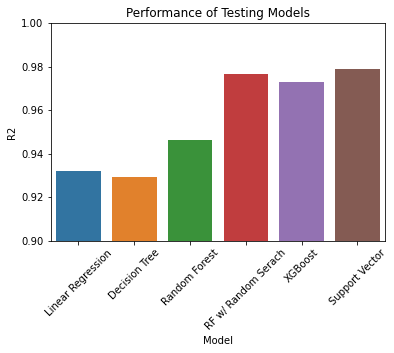

In [68]:
sns.barplot(data=model_R2_results, x='Model', y='R2')
plt.title('Performance of Testing Models')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'RF w/ Random Serach'),
  Text(4, 0, 'XGBoost'),
  Text(5, 0, 'Support Vector')])

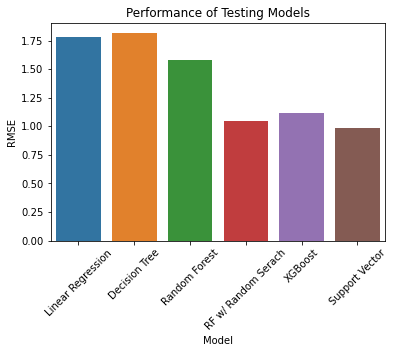

In [69]:
sns.barplot(data=model_rmse_results, x='Model', y='RMSE')
plt.title('Performance of Testing Models')
plt.xticks(rotation=45)